<a href="https://colab.research.google.com/github/Diksha-Bora/Data-Science-project/blob/main/DecisionTree11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DECISION TREE REGRESSION

In [71]:
# IMPORTING REQUIRED LIBRARIES
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
# FETCHING DATASET
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
data = pd.DataFrame(housing.data , columns = housing.feature_names)
data['Target'] = housing.target
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [73]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [74]:
data.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

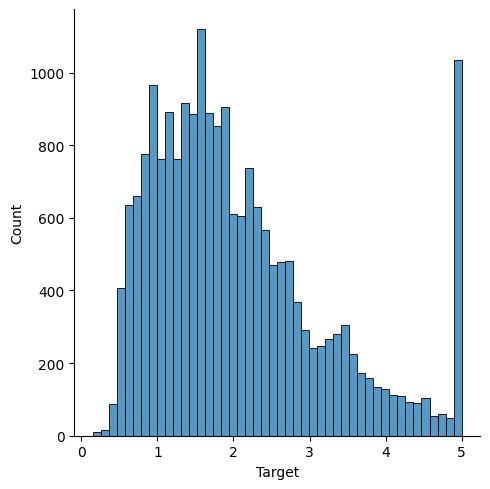

In [75]:
# DATA VISUALIZATION
sns.displot(data,x="Target")

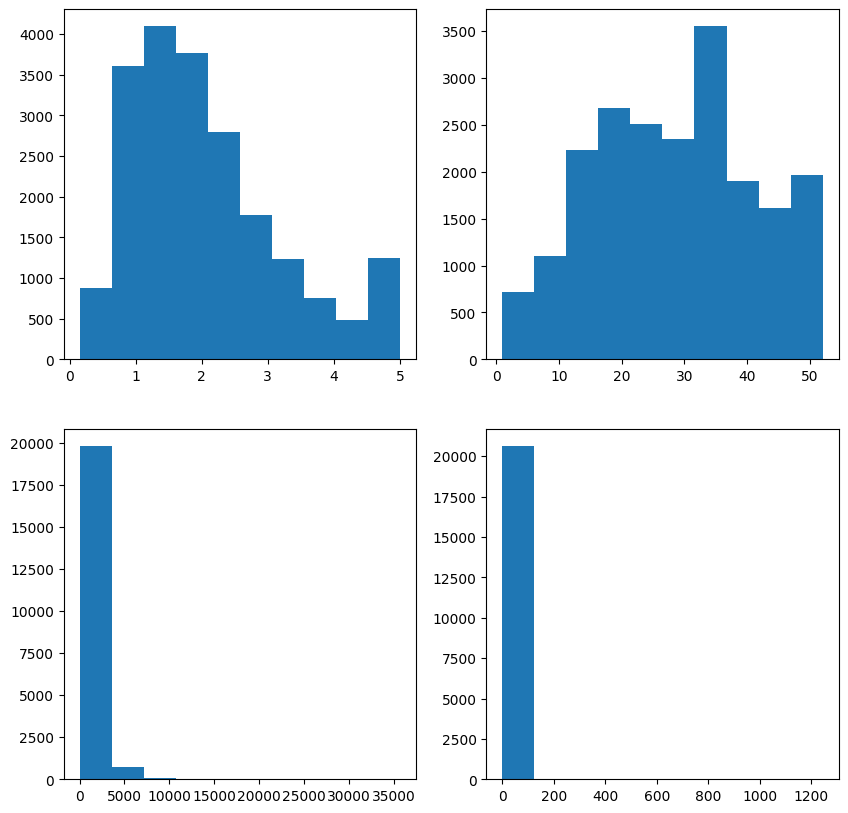

In [76]:
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.hist(data["Target"])
plt.subplot(2,2,2)
plt.hist(data["HouseAge"])
plt.subplot(2,2,3)
plt.hist(data["Population"])
plt.subplot(2,2,4)
plt.hist(data["AveOccup"])
plt.show()

In [77]:
input = data.drop("Target",axis = 1)
output = data["Target"]

In [78]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
input_train,input_test , output_train , output_test = train_test_split(input,output,test_size=0.2,random_state =25)

In [79]:
# MODEL SELECTION AND FITTING
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=4,random_state = 20)
dtr.fit(input_train,output_train)

DecisionTreeRegressor(max_depth=4, random_state=20)

In [80]:
y_pred_train = dtr.predict(input_train)
y_pred_test = dtr.predict(input_test)

In [81]:
# MODEL EVALUATION USING METRICS
from sklearn.metrics import mean_squared_error ,r2_score
print("TRAIN DATA")
print("mean_squared_error :",mean_squared_error(output_train,y_pred_train))
print("r2_score :",r2_score(output_train,y_pred_train))
print("TEST DATA")
print("mean_squared_error",mean_squared_error(output_test,y_pred_test))
print("r2_score",r2_score(output_test,y_pred_test))

TRAIN DATA
mean_squared_error : 0.5572655446955442
r2_score : 0.5844192059306004
TEST DATA
mean_squared_error 0.5522797522687176
r2_score 0.5731749358675355


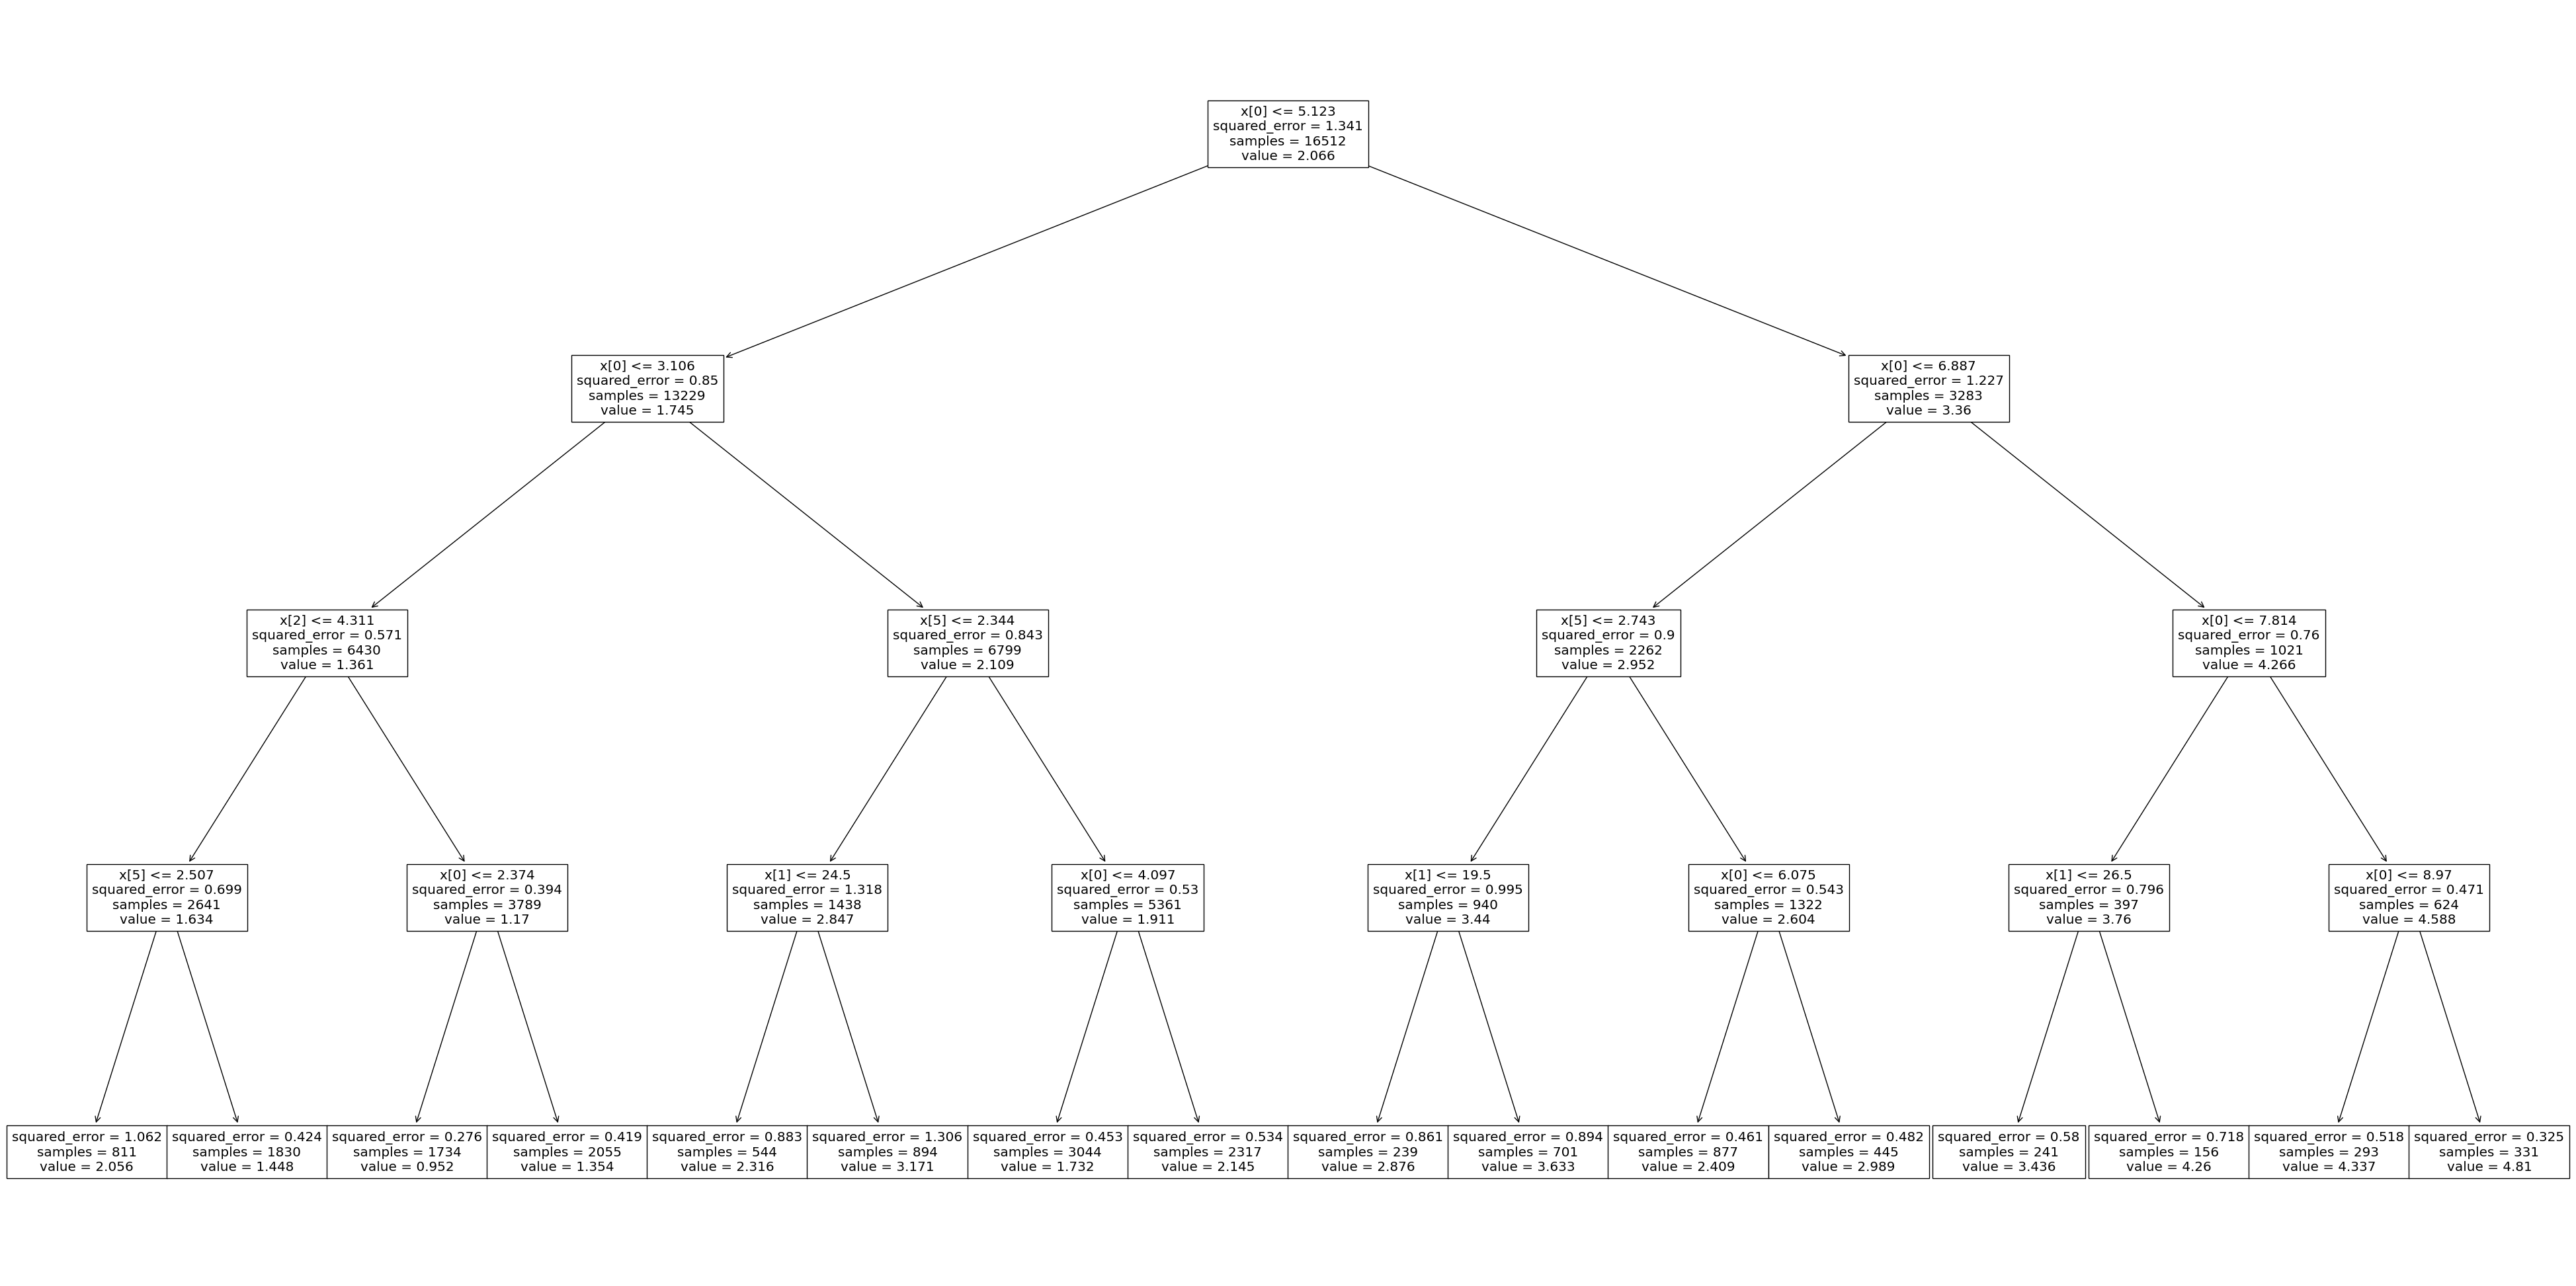

In [82]:
# DECISION TREE REPRESENTATION
from sklearn.tree import plot_tree
plt.figure(figsize=[50,25])
plot_tree(dtr)
plt.show()